In [ ]:
import benchmax.inspection as ev

stats = ev.csv_to_pandas('stats_smtrat_25-02-06_12:18.csv')

solvers = ['smtrat-MCSAT_OCNewBC-development','smtrat-MCSAT_OCNewBCpdel-development']

def compute_poly_count(df, s):
    df[(s,'smtrat-cadcells_projections.poly_count')] = df[(s,'smtrat-cadcells_projections.coefficient.level.count')] + df[(s,'smtrat-cadcells_projections.discriminant.level.count')] + df[(s,'smtrat-cadcells_projections.factor.level.count')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.level.count')] + df[(s,'smtrat-cadcells_projections.resultant.level.count')]
    df[(s,'smtrat-cadcells_projections.discres.poly_count')] = df[(s,'smtrat-cadcells_projections.discriminant.level.count')] + df[(s,'smtrat-cadcells_projections.resultant.level.count')]
    df[(s,'smtrat-cadcells_projections.timer.discres.overall_ms')] = df[(s,'smtrat-cadcells_projections.timer.discriminant.overall_ms')] + df[(s,'smtrat-cadcells_projections.timer.resultant.overall_ms')]

def compute_poly_total_degree(df, s):
    df[(s,'smtrat-cadcells_projections.poly.total_degree.sum')] = df[(s,'smtrat-cadcells_projections.coefficient.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.discriminant.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.factor.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.resultant.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.derivative.total_degree.sum')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.count')] = df[(s,'smtrat-cadcells_projections.coefficient.total_degree.count')] + df[(s,'smtrat-cadcells_projections.discriminant.total_degree.count')] + df[(s,'smtrat-cadcells_projections.factor.total_degree.count')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.count')] + df[(s,'smtrat-cadcells_projections.resultant.total_degree.count')] + df[(s,'smtrat-cadcells_projections.derivative.total_degree.count')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.avg')] = df[(s,'smtrat-cadcells_projections.poly.total_degree.sum')] / df[(s,'smtrat-cadcells_projections.poly.total_degree.count')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.max')] = df[[(s,'smtrat-cadcells_projections.coefficient.total_degree.max'),(s,'smtrat-cadcells_projections.discriminant.total_degree.max'),(s,'smtrat-cadcells_projections.factor.total_degree.max'),(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.max'),(s,'smtrat-cadcells_projections.resultant.total_degree.max'),(s,'smtrat-cadcells_projections.derivative.total_degree.max')]].max(axis=1)

def compute_interval_count(df, s):
    df[(s,'smtrat-cadcells_heuristics.interval.point_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.point_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.closed_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.closed_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.halfclosed_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.halfclosed_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.open_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.open_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]

for s in ev.get_solvers(stats):
    compute_poly_count(stats, s)
    compute_poly_total_degree(stats, s)
    compute_interval_count(stats, s)

def transform_to_seconds(df):
    for solver in df.columns.get_level_values(0).unique():
        df[(solver,'runtime')] /= 1000
        for field in ev.get_fields(df, solver):
            if '.overall_ms' in field:
                field2 = field.replace('.overall_ms','.overall_s')
                df[(solver,field2)] = df[(solver,field)] / 1000

transform_to_seconds(stats)

ev.setup_accessible_styles()

/home/jnalbach/vc/smt/benchmax-py/benchmax/inspection/load.py:119: DtypeWarning: Columns (168,470,771,1074) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, header=[0, 1], index_col=0)
/tmp/ipykernel_34303/2301064594.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(solver,field2)] = df[(solver,field)] / 1000
/tmp/ipykernel_34303/2301064594.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(solver,field2)] = df[(solver,field)] / 1000
/tmp/ipykernel_34303/23010645

# Overall Results

In [50]:
ev.inspect_answer(stats)

smtrat-MCSAT_OCNewBC-development  \
count                                          12154   
sat                                             5130   
unsat                                           5031   
unknown                                            0   
wrong                                              0   
error                                              0   
timeout                                         1956   
memout                                            36   
no answer                                          0   
segmentation fault                                 0   
segfault                                           1   
abort                                              0   
invalid                                            0   
success                                            0   
solved                                         10161   

                    smtrat-MCSAT_OCNewBCpdel-development  \
count                                              12154   
sat                                                 5126   
unsat                                               5031   
unknown                                                0   
wrong                                                  0   
error                                                  0   
timeout                                             1960   
memout                                                37   
no answer                                              0   
segmentation fault                                     0   
segfault                                               0   
abort                                                  0   
invalid                                                0   
success                                                0   
solved                                             10157   

                    smtrat-MCSAT_OCNewLDB-development  \
count                                           12154   
sat                                              5129   
unsat                                            5029   
unknown                                             0   
wrong                                               0   
error                                               0   
timeout                                          1959   
memout                                             36   
no answer                                           0   
segmentation fault                                  0   
segfault                                            1   
abort                                               0   
invalid                                             0   
success                                             0   
solved                                          10158   

                    smtrat-MCSAT_OCNewLDBpdel-development  
count                                               12154  
sat                                                  5125  
unsat                                                5035  
unknown                                                 0  
wrong                                                   0  
error                                                   0  
timeout                                              1957  
memout                                                 37  
no answer                                               0  
segmentation fault                                      0  
segfault                                                0  
abort                                                   0  
invalid                                                 0  
success                                                 0  
solved                                              10160

(8000.0, 10500.0)

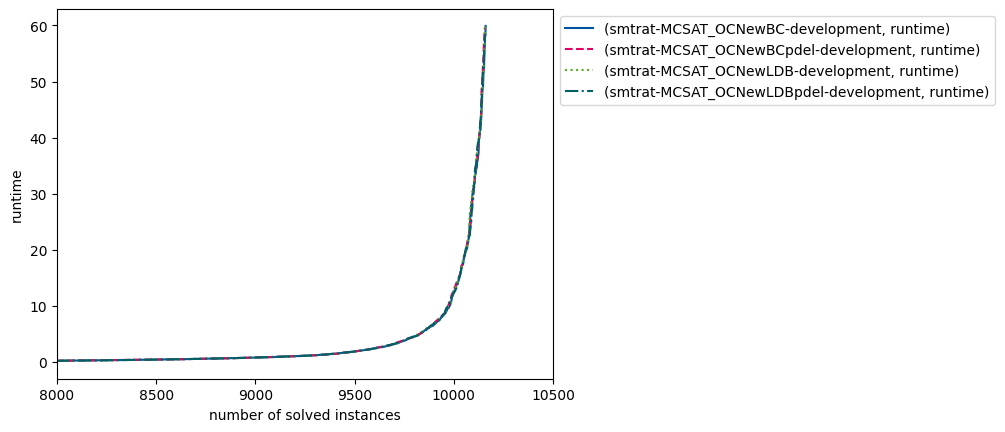

In [51]:
plot = ev.performance_profile(stats,ev.get_solvers(stats))
plot.axes.legend(bbox_to_anchor=(1,1))
plot.set_xlim(8000,10500)


In [52]:
ev.unique_solved_instances(stats,ev.get_solvers(stats)[0:2])

num. unique instances  \
()                                                                   1977   
(smtrat-MCSAT_OCNewBC-development,)                                    20   
(smtrat-MCSAT_OCNewBCpdel-development,)                                16   
(smtrat-MCSAT_OCNewBC-development, smtrat-MCSAT...                  10141   

                                                    rel. unique instances  
()                                                               0.162662  
(smtrat-MCSAT_OCNewBC-development,)                              0.001646  
(smtrat-MCSAT_OCNewBCpdel-development,)                          0.001316  
(smtrat-MCSAT_OCNewBC-development, smtrat-MCSAT...               0.834376

In [53]:
ev.unique_solved_instances(stats,ev.get_solvers(stats)[2:4])

num. unique instances  \
()                                                                   1978   
(smtrat-MCSAT_OCNewLDB-development,)                                   16   
(smtrat-MCSAT_OCNewLDBpdel-development,)                               18   
(smtrat-MCSAT_OCNewLDB-development, smtrat-MCSA...                  10142   

                                                    rel. unique instances  
()                                                               0.162745  
(smtrat-MCSAT_OCNewLDB-development,)                             0.001316  
(smtrat-MCSAT_OCNewLDBpdel-development,)                         0.001481  
(smtrat-MCSAT_OCNewLDB-development, smtrat-MCSA...               0.834458

# Applications of Optimization

/tmp/ipykernel_34303/4095845059.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stats[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective_sum.by_depth.total')] = stats[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective.by_depth.total')] + stats[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective_unbounded.by_depth.total')]


<AxesSubplot:xlabel='(smtrat-MCSAT_OCNewBCpdel-development, smtrat-cadcells_pdel.poly_count.nonprojective_sum.by_depth.total)', ylabel='(smtrat-MCSAT_OCNewBCpdel-development, smtrat-cadcells_pdel.poly_count.projective.by_depth.total)'>

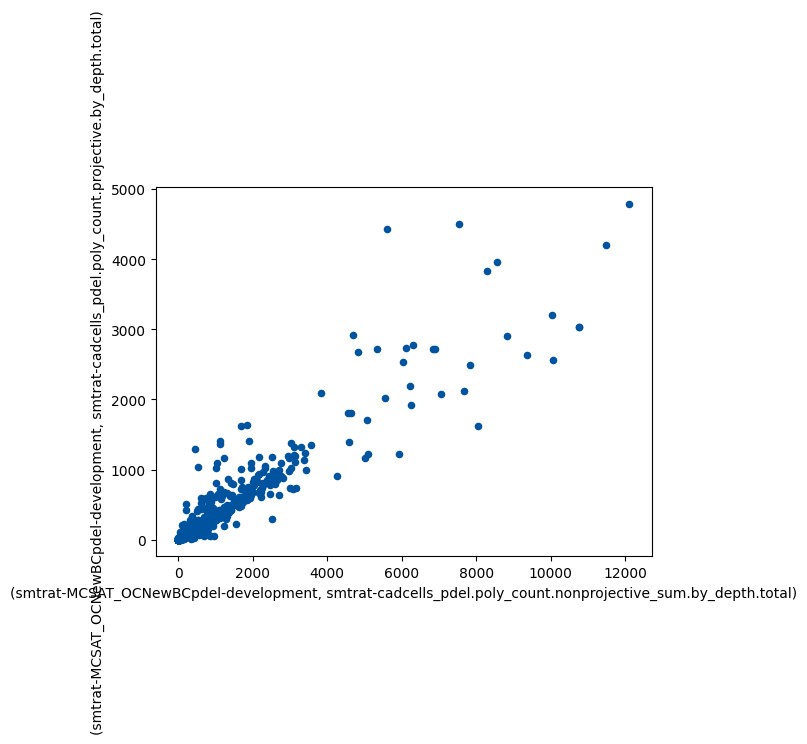

In [54]:
stats[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective_sum.by_depth.total')] = stats[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective.by_depth.total')] + stats[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective_unbounded.by_depth.total')]

stats1 = ev.filter(stats,solved_by=[solvers[1]])
stats1.plot.scatter((solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective_sum.by_depth.total'),(solvers[1],'smtrat-cadcells_pdel.poly_count.projective.by_depth.total'))


In [55]:
sum_nonprojective = stats1[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective.by_depth.total')].sum()
sum_nonprojective_unbounded = stats1[(solvers[1],'smtrat-cadcells_pdel.poly_count.nonprojective_unbounded.by_depth.total')].sum()
sum_projective = stats1[(solvers[1],'smtrat-cadcells_pdel.poly_count.projective.by_depth.total')].sum()

print(sum_nonprojective,sum_nonprojective_unbounded,sum_projective)

4089.0 826795.0 307822.0


In [56]:
ev.unique_solved_instances(stats,solvers)

num. unique instances  \
()                                                                   1977   
(smtrat-MCSAT_OCNewBC-development,)                                    20   
(smtrat-MCSAT_OCNewBCpdel-development,)                                16   
(smtrat-MCSAT_OCNewBC-development, smtrat-MCSAT...                  10141   

                                                    rel. unique instances  
()                                                               0.162662  
(smtrat-MCSAT_OCNewBC-development,)                              0.001646  
(smtrat-MCSAT_OCNewBCpdel-development,)                          0.001316  
(smtrat-MCSAT_OCNewBC-development, smtrat-MCSAT...               0.834376

# Quality of Cells

In [57]:
def compare_runtime(df, s1, s2, field="runtime"):
    df1 = df[[(s1,field ), (s2,field)]].copy()
    maxval = max(df[(s1,field)].max(), df[(s2,field)].max()) * 1.05
    df1.loc[ (df[(s1,'answer')].isin(['timeout', 'memout'])), (s1,field) ] = maxval
    df1.loc[ (df[(s2,'answer')].isin(['timeout', 'memout'])), (s2,field) ] = maxval

    return ev.scatter_plot(df1, s1, s2, field)


Text(0, 0.5, '\\texttt{BC-PD}')

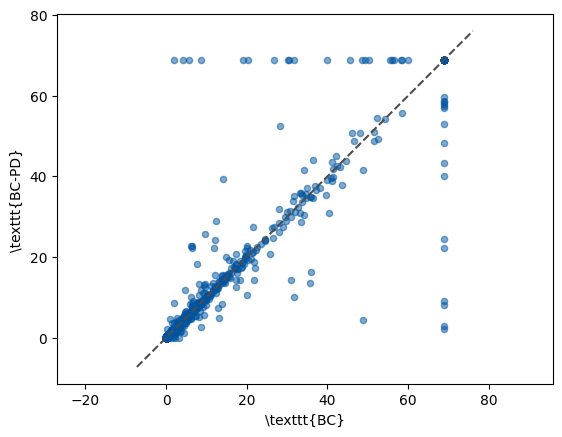

In [58]:
ax = compare_runtime(stats, solvers[0], solvers[1], 'runtime')
ev.scatter_axis_equal(ax)
ev.scatter_equal_line(ax)

ax.set_xlabel('\\texttt{BC}')
ax.set_ylabel('\\texttt{BC-PD}')

#tikzplotlib.save('runtime.tex',axis_width='7cm',axis_height='7cm')

In [59]:
def compare_field_single(df, s1, s2, field):
    df1 = df[[(s1,field), (s2,field)]].copy()
    maxval = max(df[(s1,field)].max(), df[(s2,field)].max()) * 1.05
    df1.loc[ (df[(s1,'answer')].isin(['timeout', 'memout'])), (s1,field) ] = maxval
    df1.loc[ (df[(s2,'answer')].isin(['timeout', 'memout'])), (s2,field) ] = maxval
    return ev.scatter_plot(df1, s1, s2, field)


Text(0, 0.5, '\\texttt{BC-PD}')

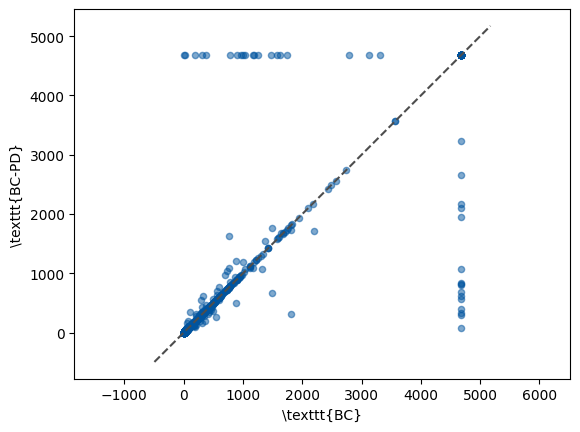

In [60]:
ax = compare_field_single(stats, solvers[0], solvers[1], 'mcsat-explanation-onecell_explanation_called')
ev.scatter_axis_equal(ax)
ev.scatter_equal_line(ax)

ax.set_xlabel('\\texttt{BC}')
ax.set_ylabel('\\texttt{BC-PD}')

#tikzplotlib.save('num_cells.tex',axis_width='7cm',axis_height='7cm')

Text(0, 0.5, '\\texttt{BC-PD}')

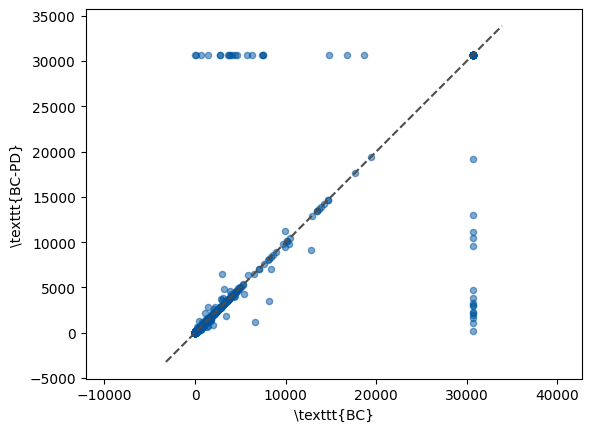

In [61]:
ax = compare_field_single(stats, solvers[0], solvers[1], 'smtrat-cadcells_rules.sgn_inv.count.by_depth.total')
ev.scatter_axis_equal(ax)
ev.scatter_equal_line(ax)

ax.set_xlabel('\\texttt{BC}')
ax.set_ylabel('\\texttt{BC-PD}')

#tikzplotlib.save('num_polys.tex',axis_width='7cm',axis_height='7cm')

Text(0, 0.5, '\\texttt{BC-PD}')

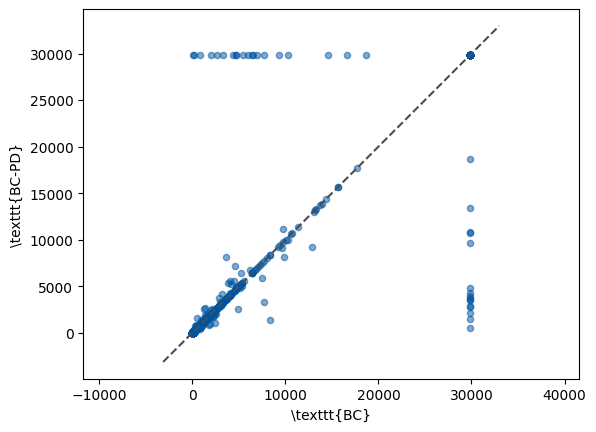

In [62]:
ax = compare_field_single(stats, solvers[0], solvers[1], 'smtrat-cadcells_operator.delineate.num_roots.by_depth.total')
ev.scatter_axis_equal(ax)
ev.scatter_equal_line(ax)

ax.set_xlabel('\\texttt{BC}')
ax.set_ylabel('\\texttt{BC-PD}')

#tikzplotlib.save('num_roots.tex',axis_width='7cm',axis_height='7cm')

Text(0, 0.5, '\\texttt{BC-PD}')

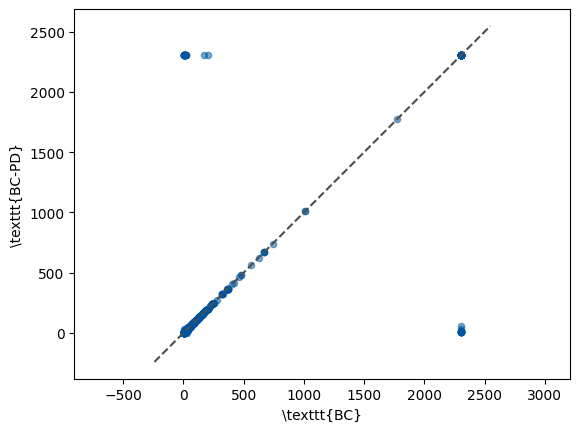

In [63]:
ax = compare_field_single(stats, solvers[0], solvers[1], 'smtrat-cadcells_projections.poly.total_degree.max')
ev.scatter_axis_equal(ax)
ev.scatter_equal_line(ax)

ax.set_xlabel('\\texttt{BC}')
ax.set_ylabel('\\texttt{BC-PD}')

#tikzplotlib.save('max_degree.tex',axis_width='7cm',axis_height='7cm')

# Misc

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def compare_field(df, s1, s2, field, ax):
    df1 = df[[(s1,field), (s2,field)]].copy()
    maxval = max(df[(s1,field)].max(), df[(s2,field)].max()) * 1.05
    df1.loc[ (df[(s1,'answer')].isin(['timeout', 'memout'])), (s1,field) ] = maxval
    df1.loc[ (df[(s2,'answer')].isin(['timeout', 'memout'])), (s2,field) ] = maxval
    df1.plot.scatter(ax=ax, x=(s1,field), y=(s2,field))

def compare_timer(df, s1, s2, field, ax):
    df1 = df[[(s1,field + ".overall_s"), (s2,field+ ".overall_s")]].copy()
    maxval = max(df[(s1,field+ ".overall_s")].max(), df[(s2,field+ ".overall_s")].max()) * 1.05
    df1.loc[ (df[(s1,'answer')].isin(['timeout', 'memout'])), (s1,field+ ".overall_s") ] = maxval
    df1.loc[ (df[(s2,'answer')].isin(['timeout', 'memout'])), (s2,field+ ".overall_s") ] = maxval

    df1.loc[ (df[(s1,field+".active_at_timeout")]==1), (s1,field+ ".overall_s") ] = maxval * 1.05
    df1.loc[ (df[(s2,field+".active_at_timeout")]==1), (s2,field+ ".overall_s") ] = maxval * 1.05

    df1.plot.scatter(ax=ax, x=(s1,field+ ".overall_s"), y=(s2,field+ ".overall_s"))

def compare(df, s1, s2):
    fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20,30))
    fig.text(0.5, 0.04, s1, ha='center')
    fig.text(0.04, 0.5, s2, va='center', rotation='vertical')

    ax = axs.reshape(-1)
    idx = 0

    ax[idx].title.set_text('Running time')
    df.plot.scatter(ax=ax[idx], x=(s1,'runtime'), y=(s2,'runtime'))
    idx = idx+1

    ax[idx].title.set_text('Projection time')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (real roots)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.real_roots', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (is_nullified)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.is_nullified', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (resultant)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.resultant', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (discriminant)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.discriminant', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (ldcf)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.ldcf', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (coeffs)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.coeffs', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (derivative)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.derivative', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('Projection time (factors_nonconst)')
    compare_timer(df, s1, s2, 'smtrat-cadcells_projections.timer.factors_nonconst', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# projection polys')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.poly_count', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# discriminants')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.discriminant.total_degree.count', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# resultants')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.resultant.total_degree.count', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# leading_coefficient')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.leading_coefficient.total_degree.count', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# coefficient')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.coefficient.total_degree.count', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# number of cells')
    compare_field(df, s1, s2, 'mcsat-explanation-onecell_explanation_called', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# sgn inv rule')
    compare_field(df, s1, s2, 'smtrat-cadcells_rules.sgn_inv.count.by_depth.total', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# sgn inv delineate')
    compare_field(df, s1, s2, 'smtrat-cadcells_rules.delineate_sgn_inv.count.by_depth.total', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# number of roots in derivation')
    compare_field(df, s1, s2, 'smtrat-cadcells_operator.delineate.num_roots.by_depth.total', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# number of nullified in derivation')
    compare_field(df, s1, s2, 'smtrat-cadcells_operator.delineate.num_nullified.by_depth.total', ax[idx])
    idx = idx+1

    ax[idx].title.set_text('# number of nonzero in derivation')
    compare_field(df, s1, s2, 'smtrat-cadcells_operator.delineate.num_nonzero.by_depth.total', ax[idx])
    idx = idx+1    

    ax[idx].title.set_text('max total degree')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.poly.total_degree.max', ax[idx])
    idx = idx+1    

    ax[idx].title.set_text('avg total degree')
    compare_field(df, s1, s2, 'smtrat-cadcells_projections.poly.total_degree.avg', ax[idx])
    idx = idx+1  


    

    for ax in axs.reshape(-1):
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ev.scatter_equal_line(ax)


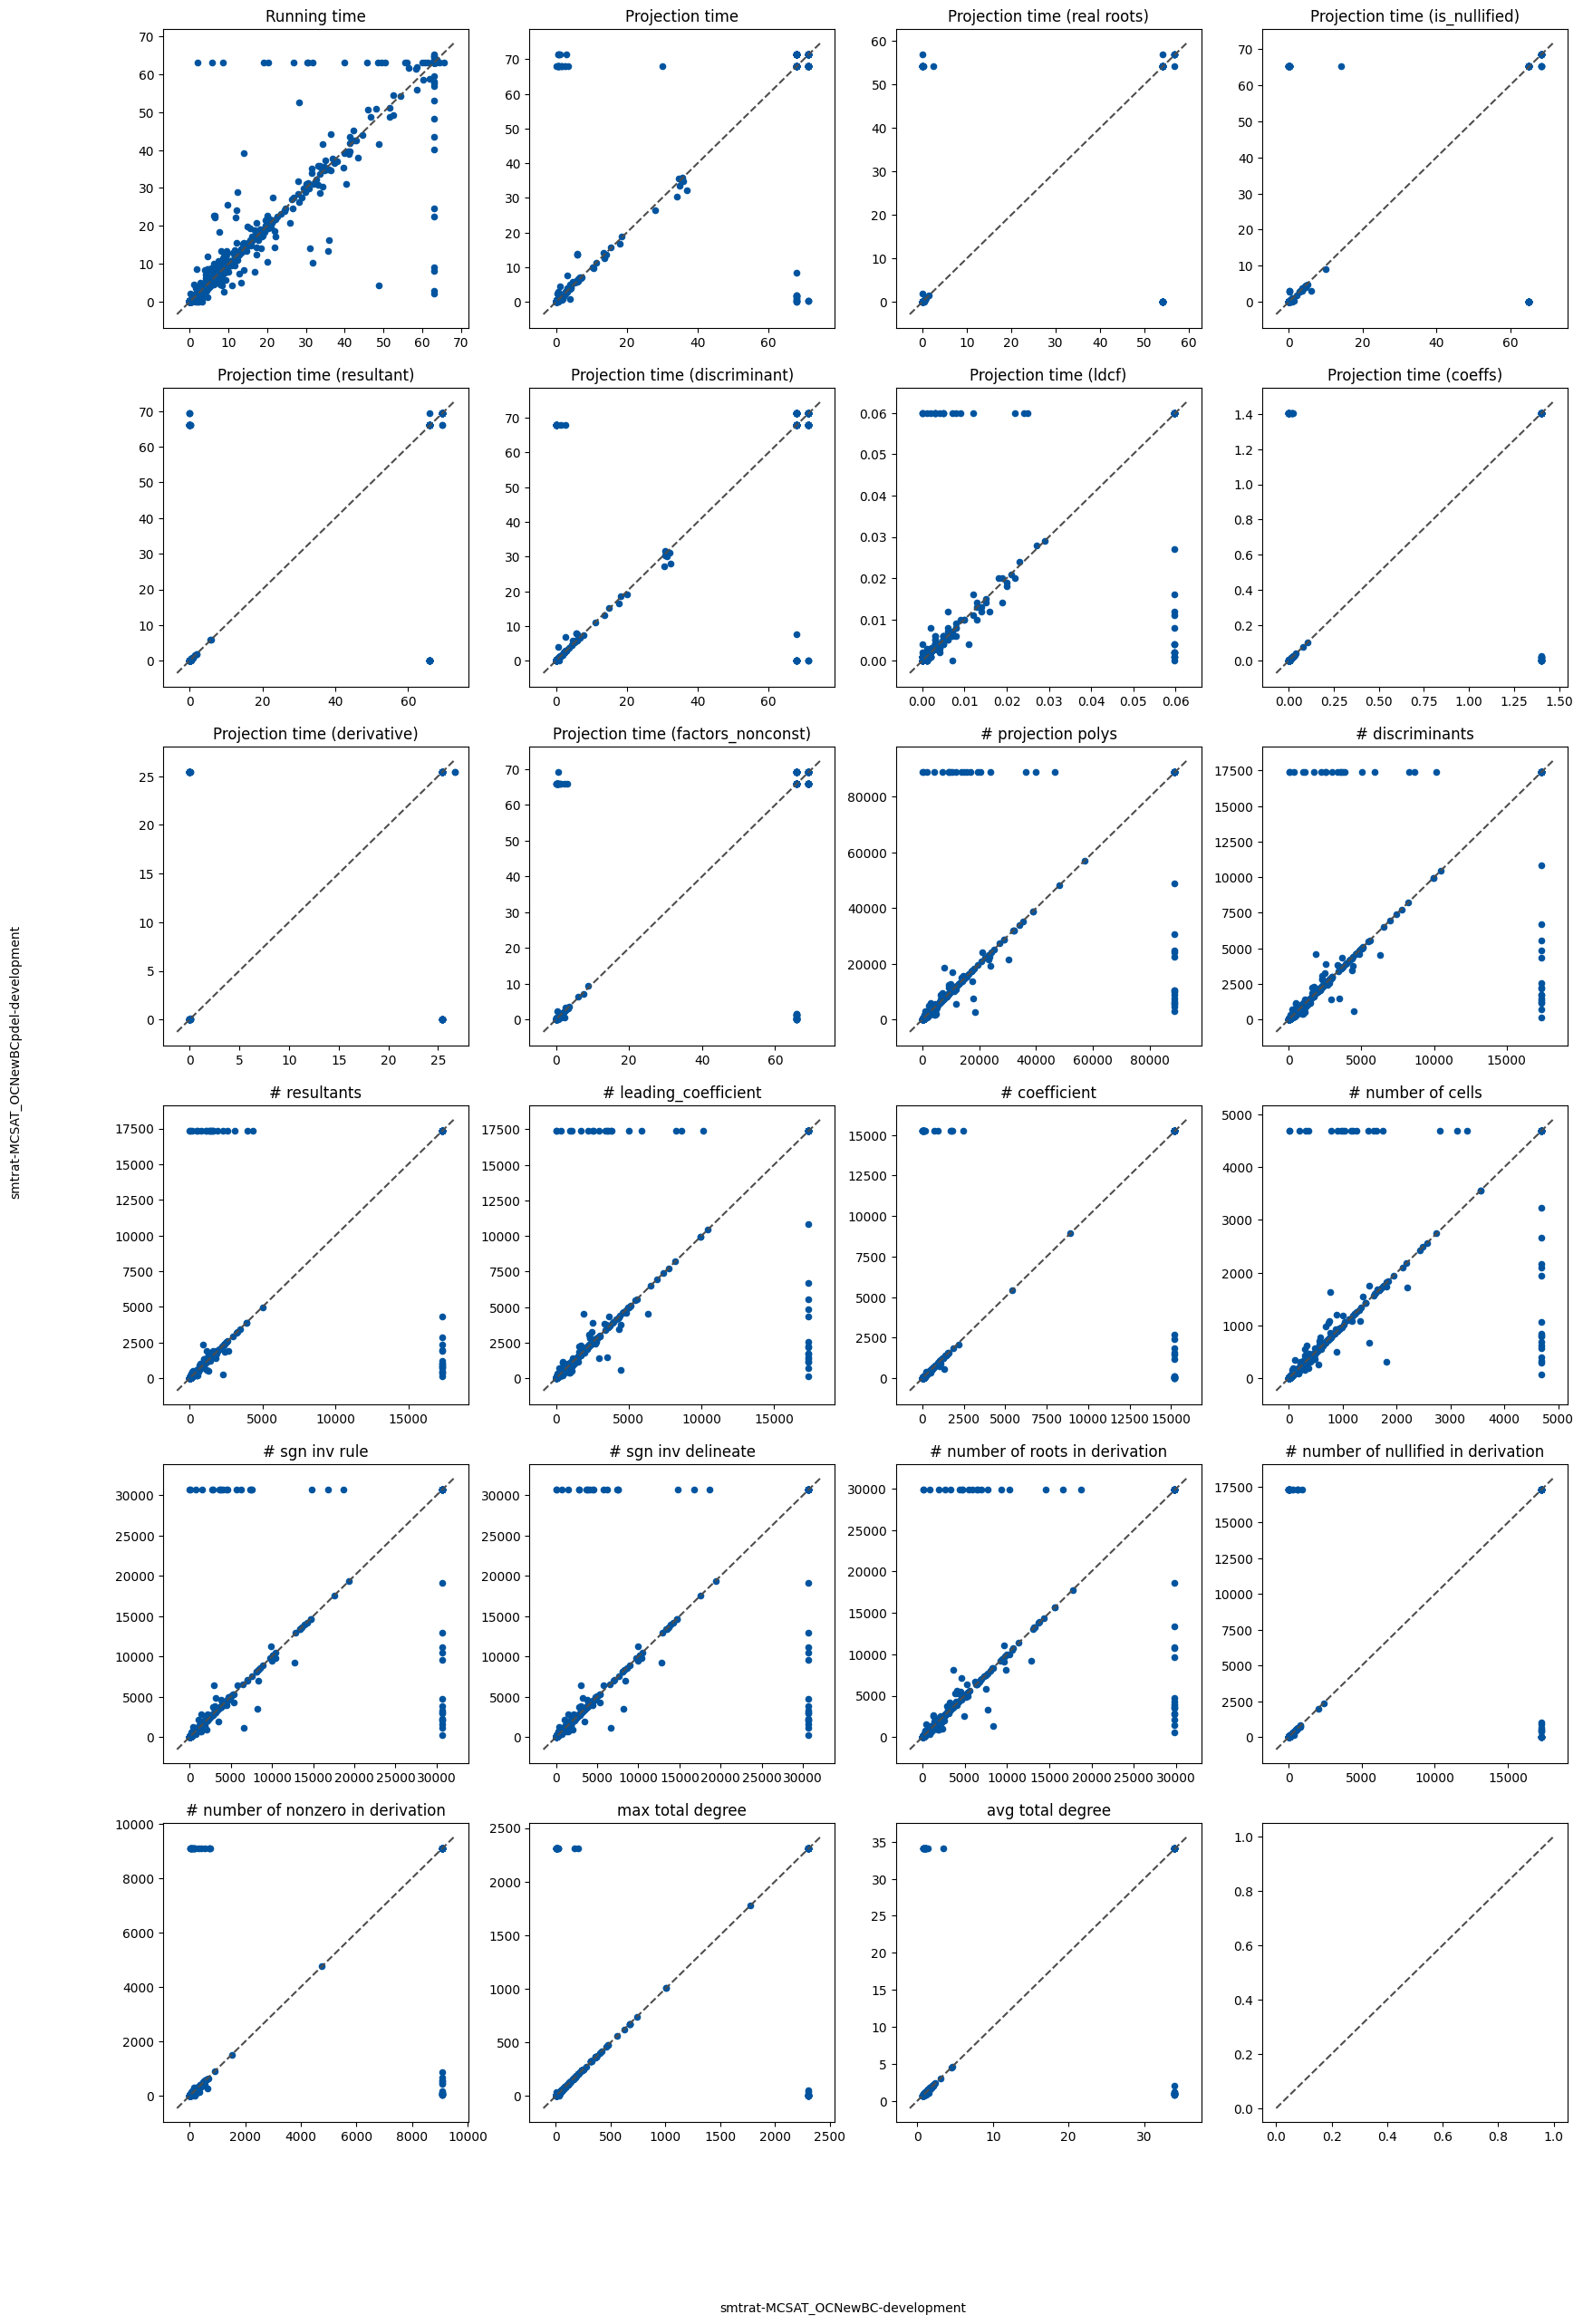

In [65]:
compare(stats,solvers[0],solvers[1])

# Role of Projection Polynomials

In [66]:
stats1 = ev.filter(stats, solved_by=[solvers[1]])

sum_projection_time = stats1[(solvers[1],'smtrat-cadcells_projections.timer.overall_s')].sum()
print('sum_projection_time', sum_projection_time)
print('sum_discriminant_time', stats1[(solvers[1],'smtrat-cadcells_projections.timer.discriminant.overall_s')].sum())
print('sum_resultant_time', stats1[(solvers[1],'smtrat-cadcells_projections.timer.resultant.overall_s')].sum())
print('sum_coeff_ldcf_time', stats1[(solvers[1],'smtrat-cadcells_projections.timer.coeffs.overall_s')].sum() + stats1[(solvers[1],'smtrat-cadcells_projections.timer.ldcf.overall_s')].sum())

print('rel_discriminant_time', stats1[(solvers[1],'smtrat-cadcells_projections.timer.discriminant.overall_s')].sum()/sum_projection_time)
print('rel_resultant_time', stats1[(solvers[1],'smtrat-cadcells_projections.timer.resultant.overall_s')].sum()/sum_projection_time)
print('rel_coeff_ldcf_time', (stats1[(solvers[1],'smtrat-cadcells_projections.timer.coeffs.overall_s')].sum() + stats1[(solvers[1],'smtrat-cadcells_projections.timer.ldcf.overall_s')].sum())/sum_projection_time)


sum_projection_time 890.8209999999999
sum_discriminant_time 489.63
sum_resultant_time 43.776999999999994
sum_coeff_ldcf_time 2.0140000000000002
rel_discriminant_time 0.5496390408398545
rel_resultant_time 0.04914230805066337
rel_coeff_ldcf_time 0.002260835790804214


In [67]:
num_max_disc = (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.discriminant.total_degree.max')]).sum()
num_max_res = (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.resultant.total_degree.max')]).sum()
num_max_ldcf_coeff = (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.leading_coefficient.total_degree.max')]).sum() + (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.coefficient.total_degree.max')]).sum()
num_max_res = (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.resultant.total_degree.max')]).sum()
num_max_factor = (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.factor.total_degree.max')]).sum()
num_max_derivative = (stats1[(solvers[1],'smtrat-cadcells_projections.poly.total_degree.max')] == stats1[(solvers[1],'smtrat-cadcells_projections.derivative.total_degree.max')]).sum()

print('num_max_disc',num_max_disc)
print('num_max_res',num_max_res)
print('num_max_ldcf_coeff',num_max_ldcf_coeff)
print('num_max_factor',num_max_factor)
print('num_max_derivative',num_max_derivative)

print(stats1.shape[0])

print('rel_max_disc',num_max_disc/stats1.shape[0])
print('rel_max_res',num_max_res/stats1.shape[0])
print('rel_max_ldcf_coeff',num_max_ldcf_coeff/stats1.shape[0])
print('rel_max_factor',num_max_factor/stats1.shape[0])
print('rel_max_derivative',num_max_derivative/stats1.shape[0])

num_max_disc 1506
num_max_res 3075
num_max_ldcf_coeff 311
num_max_factor 4027
num_max_derivative 0
10157
rel_max_disc 0.1482721275967313
rel_max_res 0.30274687407699125
rel_max_ldcf_coeff 0.030619277345672935
rel_max_factor 0.39647533720586786
rel_max_derivative 0.0
